<a href="https://colab.research.google.com/github/pinkdolphin11/ESAA/blob/main/HW_1104.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 06. 토픽 모델링(Topic Modeling) - 20 뉴스그룹

토픽 모델링 : 문서 집합에 숨어있는 주제를 찾아내는 것. 숨겨진 주제를 효과적으로 표현할 수 있는 중심 단어를 함축적으로 추출한다.

LDA(Latent Dirichlet Allocation) 기법으로 20 뉴스그룹 데이터 세트를 이용해 토픽 모델링을 수행해 보자. 모토사이클, 야구, 그래픽스, 윈도우, 중동, 기독교, 전자공학, 의학의 8개 주제를 추출하고 이들 텍스트에 LDA 기반의 토픽 모델링을 적용할 것이다.

In [1]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# 8개 주제 추출
cats = ['rec.motorcycles','rec.sport.baseball','comp.graphics','comp.windows.x','talk.politics.mideast','soc.religion.christian','sci.electronics','sci.med']

# 위에서 cats 변수로 기재된 카테고리만 추출
news_df = fetch_20newsgroups(subset='all',remove=('headers','footers','quotes'),categories=cats,random_state=0)

# LDA는 Count 기반의 벡터화만 적용
count_vect = CountVectorizer(max_df=0.95,max_features=1000,min_df=2,stop_words='english',ngram_range=(1,2))

feat_vect = count_vect.fit_transform(news_df.data)
print('CountVectorizer Shape:',feat_vect.shape)

CountVectorizer Shape: (7862, 1000)


CountVectorizer 객체 변수인 feat_vect 모두 7862개의 문서가 1000개 피처로 구성된 행렬 데이터이다. 이렇게 피처 벡터화된 데이터 세트를 기반으로 LDA 토픽 모델링을 수행해보자. 토픽의 개수는 위의 뉴스그룹에서 추출한 주제와 동일한 8개로 한다.

In [2]:
lda = LatentDirichletAllocation(n_components=8, random_state=0) # n_components로 토픽 개수 조정
lda.fit(feat_vect)

LatentDirichletAllocation(n_components=8, random_state=0)

In [3]:
# LDA 객체의 components_ 속성값 : 개별 토픽별로 각 word 피처가 얼마나 많이 할당됐는지 보여줌
# 높은 값일수록 해당 word 피처는 그 토픽의 중심 word가 된다.
print(lda.components_.shape)
lda.components_

(8, 1000)


array([[3.60992018e+01, 1.35626798e+02, 2.15751867e+01, ...,
        3.02911688e+01, 8.66830093e+01, 6.79285199e+01],
       [1.25199920e-01, 1.44401815e+01, 1.25045596e-01, ...,
        1.81506995e+02, 1.25097844e-01, 9.39593286e+01],
       [3.34762663e+02, 1.25176265e-01, 1.46743299e+02, ...,
        1.25105772e-01, 3.63689741e+01, 1.25025218e-01],
       ...,
       [3.60204965e+01, 2.08640688e+01, 4.29606813e+00, ...,
        1.45056650e+01, 8.33854413e+00, 1.55690009e+01],
       [1.25128711e-01, 1.25247756e-01, 1.25005143e-01, ...,
        9.17278769e+01, 1.25177668e-01, 3.74575887e+01],
       [5.49258690e+01, 4.47009532e+00, 9.88524814e+00, ...,
        4.87048440e+01, 1.25034678e-01, 1.25074632e-01]])

8개의 토픽별로 1000개의 word 피처가 해당 토픽별로 연관도 값을 갖고 있다. 예를 들어 components_array의 0번째 row, 10번째 col에 있는 값은 Topic #0에 대해서 피처 벡터화된 행렬에서 10번째 칼럼에 해당하는 피처가 Topic #0에 연관되는 수치 값을 갖고 있다.

In [4]:
# 각 토픽별로 연관도가 높은 순으로 Word를 나열하는 display_topics() 함수 정의

def display_topics(model, feature_names, no_top_words):
  for topic_index, topic in enumerate(model.components_):
    print('Topic #',topic_index)

    # components_array에서 가장 값이 큰 순으로 정렬했을 때, 그 값의 array 인덱스를 반환
    topic_word_indexes = topic.argsort()[::-1]
    top_indexes = topic_word_indexes[:no_top_words]

    # top_indexes 대상인 인덱스별로 feature_names에 해당하는 word feature 추출 후 join으로 concat
    feature_concat = ' '.join([feature_names[i] for i in top_indexes])
    print(feature_concat)

# CountVectorizer 객체 내의 전체 word의 명칭을 get_features_names()를 통해 추출
feature_names = count_vect.get_feature_names()

# 토픽별 가장 연관도가 높은 word 15개 추출
display_topics(lda, feature_names, 15)

Topic # 0
year 10 game medical health team 12 20 disease cancer 1993 games years patients good
Topic # 1
don just like know people said think time ve didn right going say ll way
Topic # 2
image file jpeg program gif images output format files color entry 00 use bit 03
Topic # 3
like know don think use does just good time book read information people used post
Topic # 4
armenian israel armenians jews turkish people israeli jewish government war dos dos turkey arab armenia 000
Topic # 5
edu com available graphics ftp data pub motif mail widget software mit information version sun
Topic # 6
god people jesus church believe christ does christian say think christians bible faith sin life
Topic # 7
use dos thanks windows using window does display help like problem server need know run


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


명확하게 주제를 드러내는 단어가 추출된 경우 : Topic #4(중동), #5(그래픽스), #6(기독교), #7(윈도우즈)

명확하지 않은 경우 : 나머지

## 08. 문서 유사도

### 문서 유사도 측정 방법 - 코사인 유사도

코사인 유사도(Cosine Similarity) : 벡터와 벡터 간의 유사도를 비교할 때, 벡터의 크기보다는 벡터의 상호 방향성이 얼마나 유사한지에 기반한다. 즉, 두 벡터 사이의 사잇각을 구해서 얼마나 유사한지 수치로 적용한 것이다.

### 두 벡터 사잇각

두 벡터 A, B의 내적값은 다음 식으로 구한다.

$A*B = ||A||||B||cos{\theta}$

따라서 유사도 $cos{\theta}$는 다음과 같이 두 벡터의 내적을 총 벡터 크기의 합으로 나눈 것이다.(내적 결과를 총 벡터 크기로 정규화한 것)

$similarity = cos{\theta} = \frac{A*B}{||A||||B||} = \frac{\sum_{i=1}^{n}{A_{i}B_{i}}}{\sqrt{\sum_{i=1}^{n}{A_{i}^2}}{\sqrt{\sum_{i=1}^{n}{B_{i}^2}}}}$

문서를 피처 벡터화하면 차원이 매우 많은 희소 행렬이 되기 쉬운데, 희소 행렬 기반에서 문서와 문서 벡터 간의 크기에 기반한 유사도 지표(ex. 유클리드 거리 기반 지표)는 정확도가 떨어진다. 또한 문서가 매우 긴 경우 단어의 빈도수도 더 많을 것이므로 빈도수에만 기반해서는 공정한 비교를 할 수 없다. 따라서 코사인 유사도가 더 많이 사용된다.

In [5]:
# 2개의 넘파이 배열에 대한 코사인 유사도를 구하는 cos_similarity() 함수

import numpy as np

def cos_similarity(v1, v2):

  dot_product = np.dot(v1, v2)
  l2_norm = (np.sqrt(sum(np.square(v1)))*np.sqrt(sum(np.square(v2))))
  similarity = dot_product / l2_norm

  return similarity

In [6]:
# doc_list로 정의된 간단한 문서 3개의 유사도를 비교하기 위해 이 문서를 TF-IDF로 벡터화된 행렬로 변환

from sklearn.feature_extraction.text import TfidfVectorizer

doc_list = ['if you take the blue pill, the story ends.','if you take the red pil, you stay in Wonderland','if you take the red pill, I show you how deep the rabbit hole goes']

tfidf_vect_simple = TfidfVectorizer()
feature_vect_simple = tfidf_vect_simple.fit_transform(doc_list)
print(feature_vect_simple.shape)

(3, 19)


In [7]:
# TFidVectorizer로 transform()한 결과는 희소 행렬이므로 밀집 행렬로 변환
feature_vect_dense = feature_vect_simple.todense()

# 첫 번째 문장과 두 번째 문장의 피처 벡터 추출
vect1 = np.array(feature_vect_dense[0]).reshape(-1, )
vect2 = np.array(feature_vect_dense[1]).reshape(-1, )

# 첫 번째 문장과 두 번째 문장의 피처 벡터로 두 개 문장의 코사인 유사도 추출
similarity_simple = cos_similarity(vect1, vect2)
print('문장 1, 문장 2 Cosine 유사도: {0:.3f}'.format(similarity_simple))

문장 1, 문장 2 Cosine 유사도: 0.322


In [8]:
vect1 = np.array(feature_vect_dense[0]).reshape(-1, )
vect3 = np.array(feature_vect_dense[2]).reshape(-1, )
similarity_simple = cos_similarity(vect1, vect3)
print('문장 1, 문장 3 Cosine 유사도: {0:.3f}'.format(similarity_simple))

vect2 = np.array(feature_vect_dense[1]).reshape(-1, )
vect3 = np.array(feature_vect_dense[2]).reshape(-1, )
similarity_simple = cos_similarity(vect2, vect3)
print('문장 2, 문장 3 Cosine 유사도: {0:.3f}'.format(similarity_simple))

문장 1, 문장 3 Cosine 유사도: 0.421
문장 2, 문장 3 Cosine 유사도: 0.390


In [9]:
from sklearn.metrics.pairwise import cosine_similarity

# 파라미터 : 비교 기준이 되는 문서의 피처 행렬, 비교되는 문서의 피처 행렬

similarity_simple_pair = cosine_similarity(feature_vect_simple[0],feature_vect_simple)
print(similarity_simple_pair)

[[1.         0.32194539 0.42084672]]


각각 첫 번째 문서 자기 자신, 첫 번째 문서와 두 번째 문서, 첫 번째 문서와 세 번째 문서의 유사도 값이다.

In [10]:
# 자기 자신에 대한 유사도 측정값(1) 제거
similarity_simple_pair = cosine_similarity(feature_vect_simple[0], feature_vect_simple[1:])
print(similarity_simple_pair)

[[0.32194539 0.42084672]]


In [11]:
# 모든 개별 문서에 쌍으로 코사인 유사도 값 계산
similarity_simple_pair = cosine_similarity(feature_vect_simple,feature_vect_simple)
print(similarity_simple_pair)
print('shape:',similarity_simple_pair.shape)

[[1.         0.32194539 0.42084672]
 [0.32194539 1.         0.38972173]
 [0.42084672 0.38972173 1.        ]]
shape: (3, 3)


### Opinion Review 데이터 세트를 이용한 문서 유사도 측정

In [12]:
from nltk.stem import WordNetLemmatizer
import nltk
import string

# 단어 원형 추출 함수
lemmar = WordNetLemmatizer()
def LemTokens(tokens):
    return [lemmar.lemmatize(token) for token in tokens]

# 특수 문자 사전 생성: {33: None ...}
# ord(): 아스키 코드 생성
remove_punct_dict = dict((ord(punct), None) for punct in string.punctuation)

# 특수 문자 제거 및 단어 원형 추출
def LemNormalize(text):
    # 텍스트 소문자 변경 후 특수 문자 제거
    text_new = text.lower().translate(remove_punct_dict)
    
    # 단어 토큰화
    word_tokens = nltk.word_tokenize(text_new)
    
    # 단어 원형 추출
    return LemTokens(word_tokens)

In [16]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [22]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [23]:
import pandas as pd
import glob, os
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

path = r'/content/drive/MyDrive/OpinosisDataset1.0/topics'
all_files = glob.glob(os.path.join(path,'*.data'))
filename_list = []
opinion_text = []

for file_ in all_files:
    df = pd.read_table(file_, index_col=None, header=0, encoding='latin1')
    filename_ = file_.split('||')[-1]
    filename = file_.split(',')[0]
    filename_list.append(filename)
    opinion_text.append(df.to_string())
    
document_df = pd.DataFrame({'filename':filename_list, 'opinion_text':opinion_text})
tfidf_vect = TfidfVectorizer(tokenizer=LemNormalize, stop_words='english',
                             ngram_range=(1,2), min_df=0.05, max_df=0.85)
feature_vect = tfidf_vect.fit_transform(document_df['opinion_text'])

km_cluster = KMeans(n_clusters=3, max_iter=10000, random_state=0)
km_cluster.fit(feature_vect)
cluster_label = km_cluster.labels_
cluster_centers = km_cluster.cluster_centers_
document_df['cluster_label']=cluster_label

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  % sorted(inconsistent)


이전 절에서 해당 문서의 군집화 주제는 전자제품, 호텔, 자동차였다. 이 중 호텔을 주제로 군집화된 문서를 이용해 특정 문서와 다른 문서 간의 유사도를 알아보자. 문서를 피처 벡터화해 변환하면 문서 내 단어에 출현 빈도와 같은 값을 부여해 각 문서가 단어 피처의 값으로 벡터화된다. 이렇게 각 문서가 피처 벡터화된 데이터를 cosine_similarity()를 이용해 상호 비교해 유사도를 확인하자.

In [24]:
from sklearn.metrics.pairwise import cosine_similarity

# cluster_label = 1인 데이터는 호텔로 군집화된 데이터임. DataFrame에서 해당 인덱스 추출
hotel_indexes = document_df[document_df['cluster_label']==1].index
print('호텔로 군집화된 문서들의 DataFrame Index:',hotel_indexes)

# 호텔로 군집화된 데이터 중 첫 번째 문서를 추출해 파일명 표시
comparison_docname = document_df.iloc[hotel_indexes[0]]['filename']
print('##### 비교 기준 문서명',comparison_docname,'와 타 문서 유사도#####')

'''document_df에서 추출한 Index 객체를 feature_vect로 입력해 호텔 군집화된 feature_vect 추출
이를 이용해 호텔로 군집화된 문서 중 첫 번째 문서와 다른 문서 간의 코사인 유사도 측정.'''
similarity_pair = cosine_similarity(feature_vect[hotel_indexes[0]],feature_vect[hotel_indexes])
print(similarity_pair)

호텔로 군집화된 문서들의 DataFrame Index: Int64Index([0, 8, 10, 12, 18, 19, 23, 25, 26, 36, 37, 38, 41, 44, 46, 47], dtype='int64')
##### 비교 기준 문서명 /content/drive/MyDrive/OpinosisDataset1.0/topics/bathroom_bestwestern_hotel_sfo.txt.data 와 타 문서 유사도#####
[[1.         0.05221059 0.0430688  0.06189595 0.05846178 0.51442299
  0.38038865 0.06193118 0.32619948 0.03638665 0.11742762 0.13989623
  0.1386783  0.09518068 0.11282857 0.07049362]]


Text(0.5, 1.0, '/content/drive/MyDrive/OpinosisDataset1.0/topics/bathroom_bestwestern_hotel_sfo.txt.data')

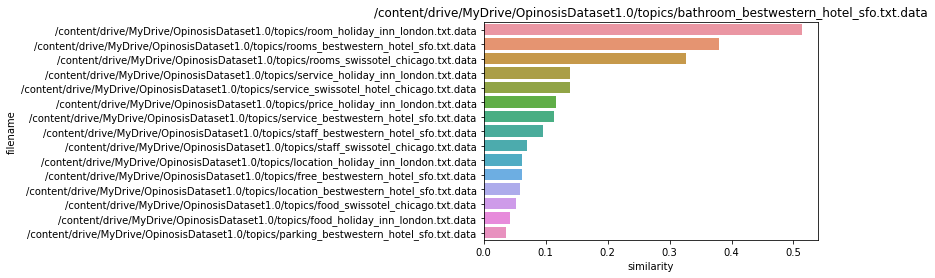

In [25]:
# 첫 번째 문서와 다른 문서 간에 유사도가 높은 순으로 정렬하고 시각화

import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 첫 번째 문서와 타 문서 간 유사도가 큰 순서대로 정렬한 인덱스를 추출하되 자기 자신은 제외
sorted_index = similarity_pair.argsort()[:,::-1]
sorted_index = sorted_index[:,1:]

# 유사도가 큰 순으로 hotel_indexes를 추출해 재정렬
hotel_sorted_indexes = hotel_indexes[sorted_index.reshape(-1)]

# 유사도가 큰 순으로 유사도 값을 재정렬하되 자기 자신은 제외
hotel_1_sim_value = np.sort(similarity_pair.reshape(-1))[::-1]
hotel_1_sim_value = hotel_1_sim_value[1:]

# 유사도가 큰 순으로 정렬된 인덱스와 유사도 값을 이용해 파일명과 유사도 값을 막대 그래프로 시각화
hotel_1_sim_df = pd.DataFrame()
hotel_1_sim_df['filename'] = document_df.iloc[hotel_sorted_indexes]['filename']
hotel_1_sim_df['similarity'] = hotel_1_sim_value

sns.barplot(x='similarity',y='filename',data=hotel_1_sim_df)
plt.title(comparison_docname)

## 09. 한글 텍스트 처리 - 네이버 영화 평점 감성 분석

### 한글 NLP 처리의 어려움

띄어쓰기와 다양한 조사 때문에 영어 등의 라틴어보다 한글 처리가 어렵다.

### KoNLPy 소개

* 파이썬의 대표적인 한글 형태소 패키지

* 형태소 : 단어로서 의미를 가지는 최소 단위

* 형태소 분석 : 말뭉치를 형태소 어근 단위로 쪼개고 각 형태소에 품사 태깅을 부착하는 작업

In [32]:
pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.4 MB 8.5 MB/s 
     |████████████████████████████████| 465 kB 48.3 MB/s 


### 데이터 로딩

In [27]:
import pandas as pd

train_df = pd.read_csv('/content/drive/MyDrive/ratings_train.txt',sep='\t')
train_df.head(3)

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0


1 : 긍정, 0 : 부정 감성

In [28]:
train_df['label'].value_counts()

0    75173
1    74827
Name: label, dtype: int64

0과 1이 어느 한쪽으로 치우치지 않고 균등한 분포를 나타낸다.

In [30]:
import re

train_df = train_df.fillna(' ')

# 정규 표현식을 이용해 숫자를 공백으로 변경
train_df['document'] = train_df['document'].apply(lambda x : re.sub(r'\d+',' ',x))

# 테스트 데이터 세트를 로딩하고 동일하게 전처리
test_df = pd.read_csv('/content/drive/MyDrive/ratings_test.txt',sep='\t')
test_df = test_df.fillna(' ')
test_df['document'] = test_df['document'].apply(lambda x : re.sub(r'\d+',' ', x))

# id 칼럼 삭제 수행
train_df.drop('id',axis=1,inplace=True)
test_df.drop('id',axis=1,inplace=True)

TF-IDF 방식으로 단어를 벡터화하는데, 먼저 각 문장을 한글 형태소 분석을 통해 형태소 단어로 토큰화한다. 한글 형태소 엔진은 SNS 분석에 적합한 Twitter 클래스를 이용한다. morphs() 메서드를 이용하면 입력 인자로 들어온 문장을 형태소 단어 형태로 토큰화해 list 객체로 반환한다.

In [33]:
from konlpy.tag import Twitter

twitter = Twitter()
def tw_tokenizer(text):
  # 입력 인자로 들어온 텍스트를 형태소 단어로 토큰화해 리스트 형태로 반환
  tokens_ko = twitter.morphs(text)
  return tokens_ko

/usr/local/lib/python3.7/dist-packages/konlpy/tag/_okt.py:17: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

tfidf_vect = TfidfVectorizer(tokenizer=tw_tokenizer,ngram_range=(1,2),min_df=3,max_df=0.9)
tfidf_vect.fit(train_df['document'])
tfidf_matrix_train = tfidf_vect.transform(train_df['document'])

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  "The parameter 'token_pattern' will not be used"


In [37]:
# 로지스틱 회귀를 이용해 감성 분석 분류 수행
lg_clf = LogisticRegression(random_state=0)

# 파라미터 C 최적화를 위해 GridSearchCV를 이용
params = {'C':[1,3.5,4.5,5.5,10]}
grid_cv = GridSearchCV(lg_clf,param_grid=params,cv=3,scoring='accuracy',verbose=1)
grid_cv.fit(tfidf_matrix_train,train_df['label'])
print(grid_cv.best_params_,round(grid_cv.best_score_,4))

Fitting 3 folds for each of 5 candidates, totalling 15 fits


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


{'C': 3.5} 0.8593


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


C = 3.5일 때 최고 0.8593의 정확도를 보인다.

테스트 세트를 이용해 최종 감성 분석 예측 수행

In [38]:
from sklearn.metrics import accuracy_score

# 학습 데이터를 적용한 TfidfVectorizer를 이용해 테스트 데이터를 TF-IDF 값으로 피처 변환
tfidf_matrix_test = tfidf_vect.transform(test_df['document'])

# classifier는 GridSearchCV에서 최적 파라미터로 학습된 classifier를 그대로 이용
best_estimator = grid_cv.best_estimator_
preds = best_estimator.predict(tfidf_matrix_test)

print('Logistic Regression 정확도:',accuracy_score(test_df['label'],preds))

Logistic Regression 정확도: 0.86186
